# Fixed Income: Zero Coupon Bond Curve Construction

## Fixed Income (Soverign Bonds/Govies/Treasuries/Gilts)
Corporations and governments issue fixed-income securities as a means of raising money. The owner of such debts lends money and expects to receive the principal when the debt matures along with the interest payments in between. Most bonds pay a fixed amount of interest semi-annually or annually. Those interest payments are also referred to as coupons and are quoted as a percentage of the face value (par value) of the bond on an annual basis.

That is the world of simple, non-compound rates. Quarterly coupon payments are infrequent though 3M increment for yield curve is of interest to some applications. If you look at therms of Bank Acccount today, the interest is likely to accrue daily and paid at the end of period. That is closer to continious compounding.



Notes vs Bonds: sovereign securities below 1Y maturity - for tenors like 90 days, 180 days are termed as Treasury Notes while above 1Y are termed as Treasury Bonds. The benchmark yield is the bond yield that is quoted by the market on the sovereign/government bonds traded in the market. Below the 90 day-maturity, the US government debt securities are known as Treasury Bills or T-Bills.

- Question 1: What is the typical interest payment frequency on Treasury Notes and Treasury Bonds?

The idea of STRIPS is that the principal and each interest payment become separate securities that are treated individually. Treasury securities with a fixed principal (par value), such as Notes and Bonds may be stripped. Bills and FRNs can't be stripped.

## Yield Curve Intuition and Uses
Yield Curve: in a normal yield curve environment, the curve is upward sloping (slope 
10
Y
−
2
Y
 is positive and PC2 is increasing, convex). The long-term interest rates being above the short-term rates is a fundamental property. It is key to the functioning and profitabiity of financial intermediaries (banks). The banks issue long-dated loans with credit risk element (often idiosyncratic to the customer) and seek funding on the short end of the curve (O/N to 2Y). The latter is often called refinancing.

Investors expect to be compensated with higher returns when they lend money for a longer period since they are exposed to distinct risks: credit risk and interest rate risk (such as uncertaity about the future realised inflation). Those risks are reflected in various forward curves, the older Bank Liability Curve published by the Bank of England was a good representation of risks in inter-bank lending.

Inverted Curve When there is a tightening/lack of liquidity in say, USD, markets, the short-term interest rates shoot above the long-term and the yield curve is regarded as inverted. A flat yield curve is regarded as the signal of economic slowdown -- why? -- one explanation is less demand for the very long-term borrowing (towards 25Y). Thus, the flat curve is not the culprit but the signal of the slowdown in real economic activity going forward.



Interest rate derivatives are popular with investors requiring bespoke payoff or cash flow. Banks are actively engaging in Asset Liability Management (ALM). The main end purpose is management of current liabilities (funding) and long-term loans issued to borrowers (assets). That is known as maturity transformation.

- Managing the interst rate risk is a specialised activity and knolwedge. It takes both, modelling and forecasting of YC evolution and how-know of interest rate market instruments, particulary how to enter Interest Rate Swap trades and IRS pricing.

Reverse Repo: the sale of securities with an agreement to repurchase them at a higher price at a specific future date. Very interesting that it is the US Federal Reserve (FED) enters the reverse repo and pays a rate of interest:

- Question 2: When FED enters the reverse repo, it sells securities to market participants. What is the purpose of these open market operaitons?

## Yield Curve Construction
The benchmark yields are the bond yields quoted on sovereign/government bonds traded in the market and the following methods are used in valuing such securities.
- Par Curve (only exists at inception for some bonds)
- Zero Coupon Curve (also Spot Curve)

Spot Rates represent the current interest rates for several maturities. The zero-coupon condition is applicable to both, Par Curve and YTM Curve: coupon payments are separated (stripped).

This implies two aspects: $rs_T(0,T)$ always and compoounding is discrete, strictly speaking but see below. Spot rates are typically simple rates paid for the period $[0,T]$. Spot curve plots zero-coupon yields against term to maturity (YTM method). This zero-coupon curve is also known as the term structure of interest rates.
- Yield-to-Maturity (YTM). This term relates more to the methodology of yield curve stripping


Think about the yield of a specific bond: it applies to its own maturity (YTM). The situation gets complicated if that bond has coupons, leading to duration and convexity specific to that bond only.

Yield To Maturity is the most common method followed in evaluating the price/yield relationship and constructing the yield curve. It is the same as Net Present Value method of measuring the hurdle rate (IRR) for long-term projects.

The principle of discounting all cash flows at a constant rate implies reinvestment of coupons at the average yield; because that's not the case in practice this is a limitation of YTM method. The cost of funds as implied by the YTM of a bond will be specific to that bond as it includes the coupons.

Two useful definitions (compatibile with CFA Handbooks):
- Spot rate applies to one payment at a determined maturity. YTM applies to all payments at all maturities.
- YTM is the weighted average of each spot rate at different maturities.

Let's consider the numeric example:

- 1-year spot rate 1\% means that a payment of 100, one year from today will have $pv = 100/1.01^1 = 99.0099$, where the exponent $T=1$ 
- 2-year spot rate 2\% means that the same payment, two years from today $PV = 100/1.02^2 = 96.1169$, where $T=2$
- 3-year spot rate 2.5\% means that the same payment, three years from today $ PV = 100/1.025^3 = 92.8599$, where $T=3$


| Spot Rate | Present Value over Period  |
|-----------|---------------------------|
| 1%        | 100 / 1.01              |
| 2%        | 100 / 1.0404            |
| 2.5%      | 100 / 1.0769            |

A 3-year, 7% coupon paid annually, $1,000 par bond will have a value today of:
$$ 70/1.02446^1 + 70/1.02446^2 + 1,070/1.02446^3 = 1,130.19 $$

as said, YTM is the weighted average of each spot rate at different maturities. PV computation follows, while YTM computation requires root-finding of a polynomial equation. Newton-Raphson numerical method can be applied to the task explictly, but also a quick call to numpy.roots() obtains the solution.

In [26]:
# Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
matplotlib.rcParams['figure.figsize'] = [14.0, 6.0]
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['lines.linewidth'] = 2.0

In [27]:
spot_rates = [0.01, 0.02, 0.025]
coupon = 70
par_value = 1000

present_values = [coupon / (1 + rate) ** (index + 1) for index, rate in enumerate(spot_rates)]
present_values.append((par_value) / (1 + spot_rates[-1]) ** len(spot_rates))

print("------------------------------")
print(f"non-ZC bond value: $ {sum(present_values):.2f}\n")

coefficients = [1130.19, -70, -70, -1070] # Coefficients of the polynomial equation

roots = np.roots(coefficients) # Solver the polynomial equation

# The first solution from R (the set of real numbers) and ignore complex numbers
for root in roots:
    print("x =", root)

------------------------------
non-ZC bond value: $ 1130.19

x = (1.0244630042056002+0j)
x = (-0.48126325782528845+0.8321790636415379j)
x = (-0.48126325782528845-0.8321790636415379j)


- Zero Coupon Yield Curve (ZCYC)
The final method is to extract the yield of each cash flow of traded bonds as implied by YTMs of various bonds.

This is Zero Coupon Yield Curve (ZCYC) method, which identifies the cost (return) of a cash flow of a particular tenor for a bond. Time-averaging of the cost (return) of every cash flow of the various bonds traded gives the ZCYC of the day.

ZCYC Curves are used extensively in fixed income pricing (eg, IRS curves are zero-rate).

The commonly adopted methods to extract zero curves (spot curves) from the traded YTMs are the Bootstrapping/Stripping and Parametric/Interpolation models. Bootstrapping here involves stripping of coupons via subtraction of their present value of the bond price.

Parametric models are essentially interpolation + smoothing via fitting of the curve data points (par points) to the predefined, well-developed function as we will see below with Nelson-Siegel-Svensson methodology.

## Par Bond
If we infer the yield (zero rate) from the formula above it is logical to refer to that as pricing. Remember, a bond is a derivative with regard to the short rate $ r(t) = f(t,t) $. 


$$\text{ZCB} = \exp\left(-\int_{t}^{T} r(s) \, ds\right)$$
Whereas, using the ready yield (zero rate) figure in order to compute the bond value, it is logical to refer to that as valuation. Different textbooks and practitioners use these terms loosely, however, and might have adopted the opposite meaning.

A zero-coupon bond doesn't pay periodic interest, where the par value is repaid. For convenience, we assume the par value of **100**, also \$1 convention is common so that we can say "90 cents on a dollar". The valuation by ready formula,

$$
ZCB_{\text{price}} = \frac{\text{par}}{(1+y)^T}
$$

$$
(1 + r_{\text{sr}})^T = \frac{\text{par}}{\text{price}}
$$

$$
(1 + r_{\text{sr}}) = \left(\frac{1}{T} \log \frac{\text{FV}}{\text{PV}}\right)
$$

- $ y = rs_T$ is the annually compounded yield, or the same as spot rate of the bond, and $T$ is the time remaining to maturity;
- par value is the same as Face Value, or Future Value; price is the same as Present Value and $1/PV = D$ is the discount factor

In [28]:
# ZCB pricing with explicit inputs
def zero_coupon_bond(par, y, t):
    return par/(1+y)**t

In [29]:
print("------------------------------")
print("5-year bond at par, compounded annually\n")
print(f'ZC bond value ${zero_coupon_bond(100, 0.05, 5):0.4}')

------------------------------
5-year bond at par, compounded annually

ZC bond value $78.35


## Zero Rates
As the compounding frequency increases, the future value of money reaches the exponential limit.

Discounting these values for a security that pays \$100 at a future time $T$ with a continuously compounded discount rate $r$, where $e^(-rT) is a discount factor.

$$ ZCB = \frac{100}{e^{rT}}$$

The above is a continuous-time spot rate -- not a simple, discrete-time spot rate. The bootstrapping object (ZCYC) below can be modfied back to operate with the discrete-time spot rates.

Zero Rates obtained below follow this YTM method. They represent the internal rate of return (IRR) of zero-coupon bonds. Further clarity: each bond yield is YTM for that maturity only, obviously across maturties **0.5 , 1, 1.5, 2** the yields are zero rates (or spot rates).


## Bootstrapping via Stripping
In this context, bootstrapping refers to extracting the Discount Factors (DF) for zero-coupon bonds (and thus, spot rates) from the prices of sequentially ordered traded securities along the timeline. Zero rates for the shorter tenors (less than 1 year) are obtained from the traded prices (equivalent to the below are T-Bills) with straightforward cmputation.

Beyond the 1Y maturity, a relation is assumed between Discount Factors of the intermediate cash flows of the traded securities, such that the resultant theoretical price is closest to the trade price.

The relation between the zero rates of intermediate cash flows may be linear or exponential (as in code below). After stripping and bootstrapping, the curve is likely to be fitted through the extracted Zero Rates, including a parametric curve on top of the bootstrapping.

Bootstrapping approach to curve construction means that we utilise the obtained yields of the shorter maturities and recursively execute (solve for) ZCB yields for further maturity points. The yields of shorter maturities are applied for discounting the matching cashflows (eg 12M=1Y coupon of the 18M=1.5Y bond in the line 4 below, therefore, preventing an arbitrage.

List of bonds with different maturities

| Face Value (Notional) | Time to Maturity | Annual Coupon | Cash Price |
|-----------------------|------------------|---------------|------------|
| 100                   | 0.25             | 0             | 97.50      |
| 100                   | 0.50             | 0             | 94.90      |
| 100                   | 1.00             | 0             | 90.00      |
| 108                   | 1.50             | 8             | 96.00      |
| 112                   | 2.00             | 12            | 101.6      |


The following code is an object-oriented implementation of recursive bootstrapping a yield curve. 

## Bootstrap Object

In [30]:
class YieldCurve():
    
    def __init__(self):
        self.zero_rates = {}                                               # Map each T to a zero rate
        self.instruments = {}                                              # Map each T to an instrument
        
    def add_instrument(self, par, T, coupon, price, compounding_freq=2):   # Default compounding freq = SEMIANNUAL
        self.instruments[T] = (par, coupon, price, compounding_freq)       # 
            
    def get_maturities(self):
        return sorted(self.instruments.keys())                             # Return sorted maturities from added instruments
    
    def get_zero_rates(self):                                              # Calculate a list of available zero rates
        self.__bootstrap_zc_bonds__()
        self.__get_bond_spot_rates__()
        return [self.zero_rates[T] for T in self.get_maturities()]
    
    def __bootstrap_zc_bonds__(self):                                      # Get rates from ZC bonds
        for T in self.instruments.keys():
            (par, coupon, price, freq) = self.instruments[T]
            if coupon == 0:                                                # This condition is satisfied for the first 3 bonds
                self.zero_rates[T] = \
                    self.zero_coupon_spot_rate(par, price, T)
    
    def __get_bond_spot_rates__(self):                                    # Get spot rates for each marurity available 
        for T in self.get_maturities():
            instrument = self.instruments[T]
            (par, coupon, price, freq) = instrument
            if coupon != 0:
                self.zero_rates[T] = self.__calculate_bond_spot_rate__(T, instrument)
    
    def __calculate_bond_spot_rate__(self, T, instrument):                 # Get spot rate via stripping of PV value of coupons
                                
        try:
            (par, coupon, price, freq) = instrument
            periods = T * freq                                             # Number of coupon payments
            value = price
            per_coupon = coupon / freq                                     # Coupon per period. Annual Coupon / 2

            for i in range(int(periods)-1):
                t = (i+1)/float(freq)
                spot_rate = self.zero_rates[t]
                discounted_coupon = per_coupon * np.exp(-spot_rate*t)
                value -= discounted_coupon

            last_period = int(periods)/float(freq)                         # Spot rate for a specific maturity
            spot_rate = -np.log(value /(par+per_coupon))/last_period
            # spot_rate = np.log((par+per_coupon)/ value ) / last_period   # Logic is the same as below PV / PVadj, the adustment is -discounted_coupon

            return spot_rate

        except:
            print (f'Error: spot rate not found for T={t}')
    
    def zero_coupon_spot_rate(self, par, price, T):
        spot_rate = np.log(par/price)/T                                    # Yield from a zero-coupon bond                   
        return spot_rate

def zero_coupon_spot_rate (last routine) is used to compute the spot rate (same as yield) for the first three zero-coupon bonds directly

```python
def zero_coupon_spot_rate(self, par, price, T):
    spot_rate = np.log(par/price)/T                                                   
    return spot_rate



Key lines that deal with the actual stripping: separation of the present value of coupon (eg, 8) from the bond price today (also present value).
```python
discounted_coupon = per_coupon * np.exp(-spot_rate*t)
value -= discounted_coupon

### Instantiate Object

In [31]:
# Inistantiate the yield curve object
yc = YieldCurve()

### Add Instruments

In [32]:
# Add instruments
yc.add_instrument(100, 0.25, 0., 97.5)
yc.add_instrument(100, 0.50, 0., 94.9)
yc.add_instrument(100, 1.00, 0., 90.0)
yc.add_instrument(100, 1.50, 8., 96.0)
yc.add_instrument(100, 2.00, 12., 101.6)

# Get instrument details
yc.instruments

{0.25: (100, 0.0, 97.5, 2),
 0.5: (100, 0.0, 94.9, 2),
 1.0: (100, 0.0, 90.0, 2),
 1.5: (100, 8.0, 96.0, 2),
 2.0: (100, 12.0, 101.6, 2)}

### Get Maturities

In [33]:
# Get list of maturities
m = yc.get_maturities()
m

[0.25, 0.5, 1.0, 1.5, 2.0]

### Get Rates

In [34]:
# Get zero rates
y = np.dot(100, yc.get_zero_rates())
y

array([10.12712319, 10.46929607, 10.53605157, 10.68092639, 10.80802755])

In [35]:
# Get zero rates for maturities
yc.zero_rates

{0.25: 0.10127123193715915,
 0.5: 0.10469296074441839,
 1.0: 0.10536051565782635,
 1.5: 0.1068092638817053,
 2.0: 0.10808027549746793}

### Visualize Rates

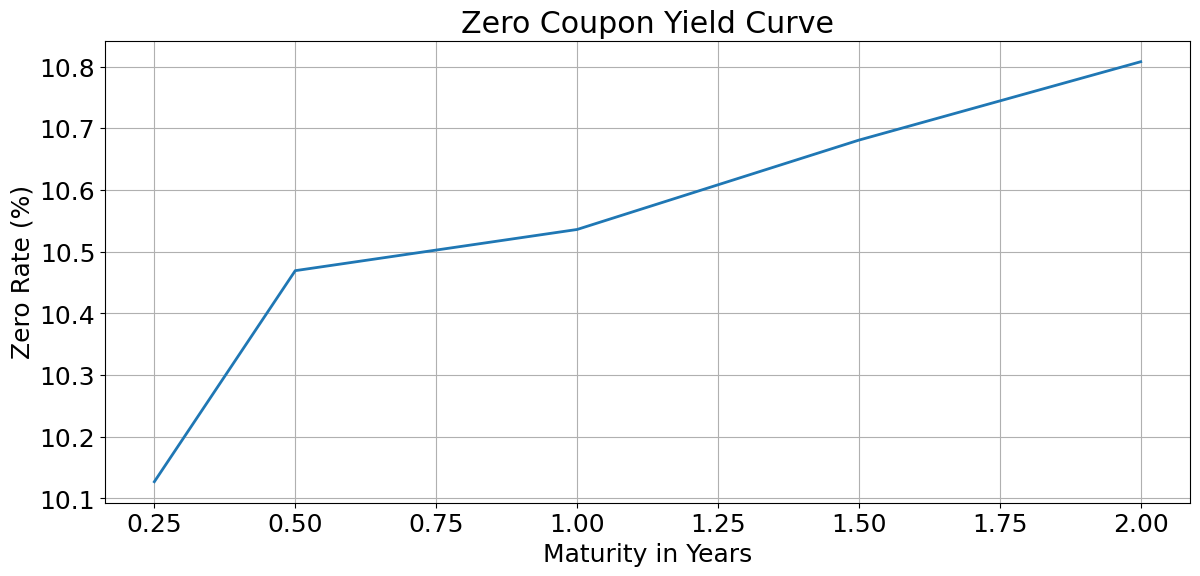

In [36]:
# Plot ZCYC
plt.plot(m, y)
plt.title("Zero Coupon Yield Curve")
plt.ylabel("Zero Rate (%)")
plt.xlabel("Maturity in Years")
plt.grid()
plt.show()

# Parametric Models for Curve Fitting

## Introduction to Nelson-Siegel

Parametric models specify a functional form for a yeld curve. This is met in curves constructed by Central Banks, where economists argued that parametric models offer a conceptually simple and parsimonious description of the term structure of interest rates. Please remember that those ECB and Bank of England curves you see on the screen have been already 'constructed'. ZCYC have been stripped, some interpolation has potentially been done, and parametric fitting (NSS method) or smothing (VRP Method) were applied. The same goes for curves on Bloomberg Terminal.

Curve interpolation and fitting is often available in terms of both spot rates and the instantaneous forward rates -- below is an example. That means that you can construct an interpolated/smoothed/ameliorated forward curve directly from the available input, eg spot rates at uneven maturities (tenors).

The common parametric model used by central banks was and remains the Nelson-Siegel model of the following linear functional form:

$$
f(m, \beta) = \beta_0 + \beta_1 \times e^{\frac{m}{\tau_1}} + \beta_2 \times \frac{m}{\tau_1} e^{- \frac{m}{\tau_1}}
$$


integrating these inferred forward rates $f$ across a maturities up to each point $T_1, T_2 , …$ results in the spot rate function, where  m is the maturity:

$$
r = \beta_0 + (\beta_1 + \beta_2) \times \left(\frac{1 - e^{-\frac{m}{\tau_1}}}{\frac{m}{\tau_1}}\right) - \beta_2 \times e^{- \frac{m}{\tau_1}}
$$


where $\beta_0, \beta_1, \beta_2, \tau_1$ , are the parameters to be estimated, eg, via least squares minimisaiton that checks squared differences at each input point.

- $\beta_0$ is the long-term level of interest rates (constant at 1); notice that it's the same for each tenor and not subject to a decay at tenor $m = \tau_1$;
- $\beta_1$ is the short-term component; NS forward curve formulation shows that it decays to zero at an exponential rate;
- $\beta_2$ is the medium-term component; increases for medium maturities and then as $\tau_1$ in denominator increases, therefore, governing slope and potentially giving a hump (lump for an inverted curve);
- $\tau_1$ is the deacy factor.

decay factor $\tau_1$ deserves further explanation: small values produce slow decay, accomodating curve fitting at long maturities; large values produce fast decay and the curve gets fitted more closely at short maturities; $\tau$ also governs where $\beta_2$ achieves its maximum.

The long-term factor $\beta_0$ governs the level of the yield curve, $\beta_1$ governs its slope, and $\beta_2$, its curvature.

Nelson Siegel model is unable to handle the change in slope and curvature in curve along more than one maturity. The model was extended to Nelson Siegel Svensson model with the additional parameters allowing an additional hump in the curve. Both models are constrained to converge to a constant level, 
$\beta_0 $ which supposedly makes negative rates fitting possible as an unintended cosequence. Forward rates reflect expectations about future short interest rates, and the constant level implies that an unbiased expectation exists and holds.

$$
f(m, \beta) = \beta_0 + \beta_1 \times e^{- \frac{m}{\tau_1}} + \beta_2 \times \frac{m}{\tau_1} e^{- \frac{m}{\tau_1}} + \beta_3 \times \frac{m}{\tau_2} e^{- \frac{m}{\tau_2}}
$$



and, the resulting ZC rates would be take the following form:

$$
r = \beta_0 + (\beta_1 + \beta_2) \times \left(\frac{1 - e^{-\frac{m}{\tau_1}}}{\frac{m}{\tau_1}}\right) - \beta_2 \times e^{- \frac{m}{\tau_1}} + \beta_3 \times e^{- \frac{m}{\tau_2}}
$$

where, $\beta_3$ determined the magnitude and direction of the second hump occuring at $\tau_2$

#### Summary Table 
| Parameter | Attribution |
|-----------|-------------|
| $\beta_0$ | the long-run level of interest rates |
| $\beta_1$ | the short-term component, represents the short rate $r(t) = f(t, t)$ |
| $\beta_2$ | the medium-term component, governs the slope |
| $\tau_1$  | the decay factor, but also governs about which tenor a typical hump is located |
| $\beta_3$ | NSS only: determines the magnitude and direction of second hump occurring at $\tau_2$ |
| $\tau_2$  | hump occurring at $\tau_2$ |



Integration over instantaneous forward rates should be consistent with the original ZC curve or spot curve, which we refer to as given by the market). NS and NSS model parameters which can be determined using optimization algorithms over the Sum of Squares minimization or Maximum Likelihood. Once the optimal parameters of the day are computed (calibrated), those can be used to build the zero and forward curves of any tenor length -- below we build up to 50Y in order to explore the Nelson-Siegel-Svensson.

One final observation is that while storing the curve as NSS fitted parameters seems to be a step away from the market data, having the functional form removes the need further discussion about how to interpolate the curve (eg, raw interpolation method, B-splines, or as advanced as Hagan-West monotone convex interpolation).

In [37]:
# Import NS package

from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols

In [38]:
# tenors (maturities)
tenors = np.array([0.0,0.5,0.75,1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0])

# yields, assume the following market rates, upward-sloping curve
yields =np.array([0.01,0.02,0.025,0.029,0.03,0.033,0.036,0.039,0.04,0.043,0.045,0.047,0.049])

In [39]:
# Step 1. Calibration. Parametric fitting of the curve is referred to as another kind of calibraiton

curve_NS, status = calibrate_ns_ols(tenors, yields) # Nelson-Siegel parametric fitting of the curve

curve_NSS, status_NSS = calibrate_nss_ols(tenors, yields)  # Nelson-Siegel-Svensson fitting

In [40]:
print("------------------------------")
print("Nelson-Siegel calibrated parameters line:\n")
print(curve_NS)

print("------------------------------")
print("Nelson-Siegel-Svensson calibrated parameters line:\n")
print(curve_NSS)

------------------------------
Nelson-Siegel calibrated parameters line:

NelsonSiegelCurve(beta0=0.05011533567911074, beta1=-0.038400035026930436, beta2=-0.000998423092393388, tau=0.968142334355349)
------------------------------
Nelson-Siegel-Svensson calibrated parameters line:

NelsonSiegelSvenssonCurve(beta0=0.14981799721717354, beta1=-0.1382241863751462, beta2=0.05254029262302006, beta3=-0.276641912603775, tau1=2.0, tau2=5.0)


| Method | $\beta_0$ | $\beta_1$ | $\beta_2$ | $\beta_3$ | $\tau$ or $\tau_1$ | $\tau_2$ |
|--------|-----------|-----------|-----------|-----------|-------------------|----------|
| NS     | 0.05012   | -0.03840  | -0.000954 | n/a       | 0.9698            | n/a      |
| NSS    | 0.14982   | -0.13822  | 0.05254   | -0.276642 | 2.0               | 5.0      |


In [41]:
# Step 2. Fitting from ready parameters, NSS function deserves exploration
# A curve is fitted to full 50Y horizon, comparable to EUR swaps ASIRSEUR50Y30A06L

y = NelsonSiegelSvenssonCurve(0.149818, -0.138224, 0.0525403, -0.276642, 2.0, 5.0 )
t = np.linspace(0, 50, 100)

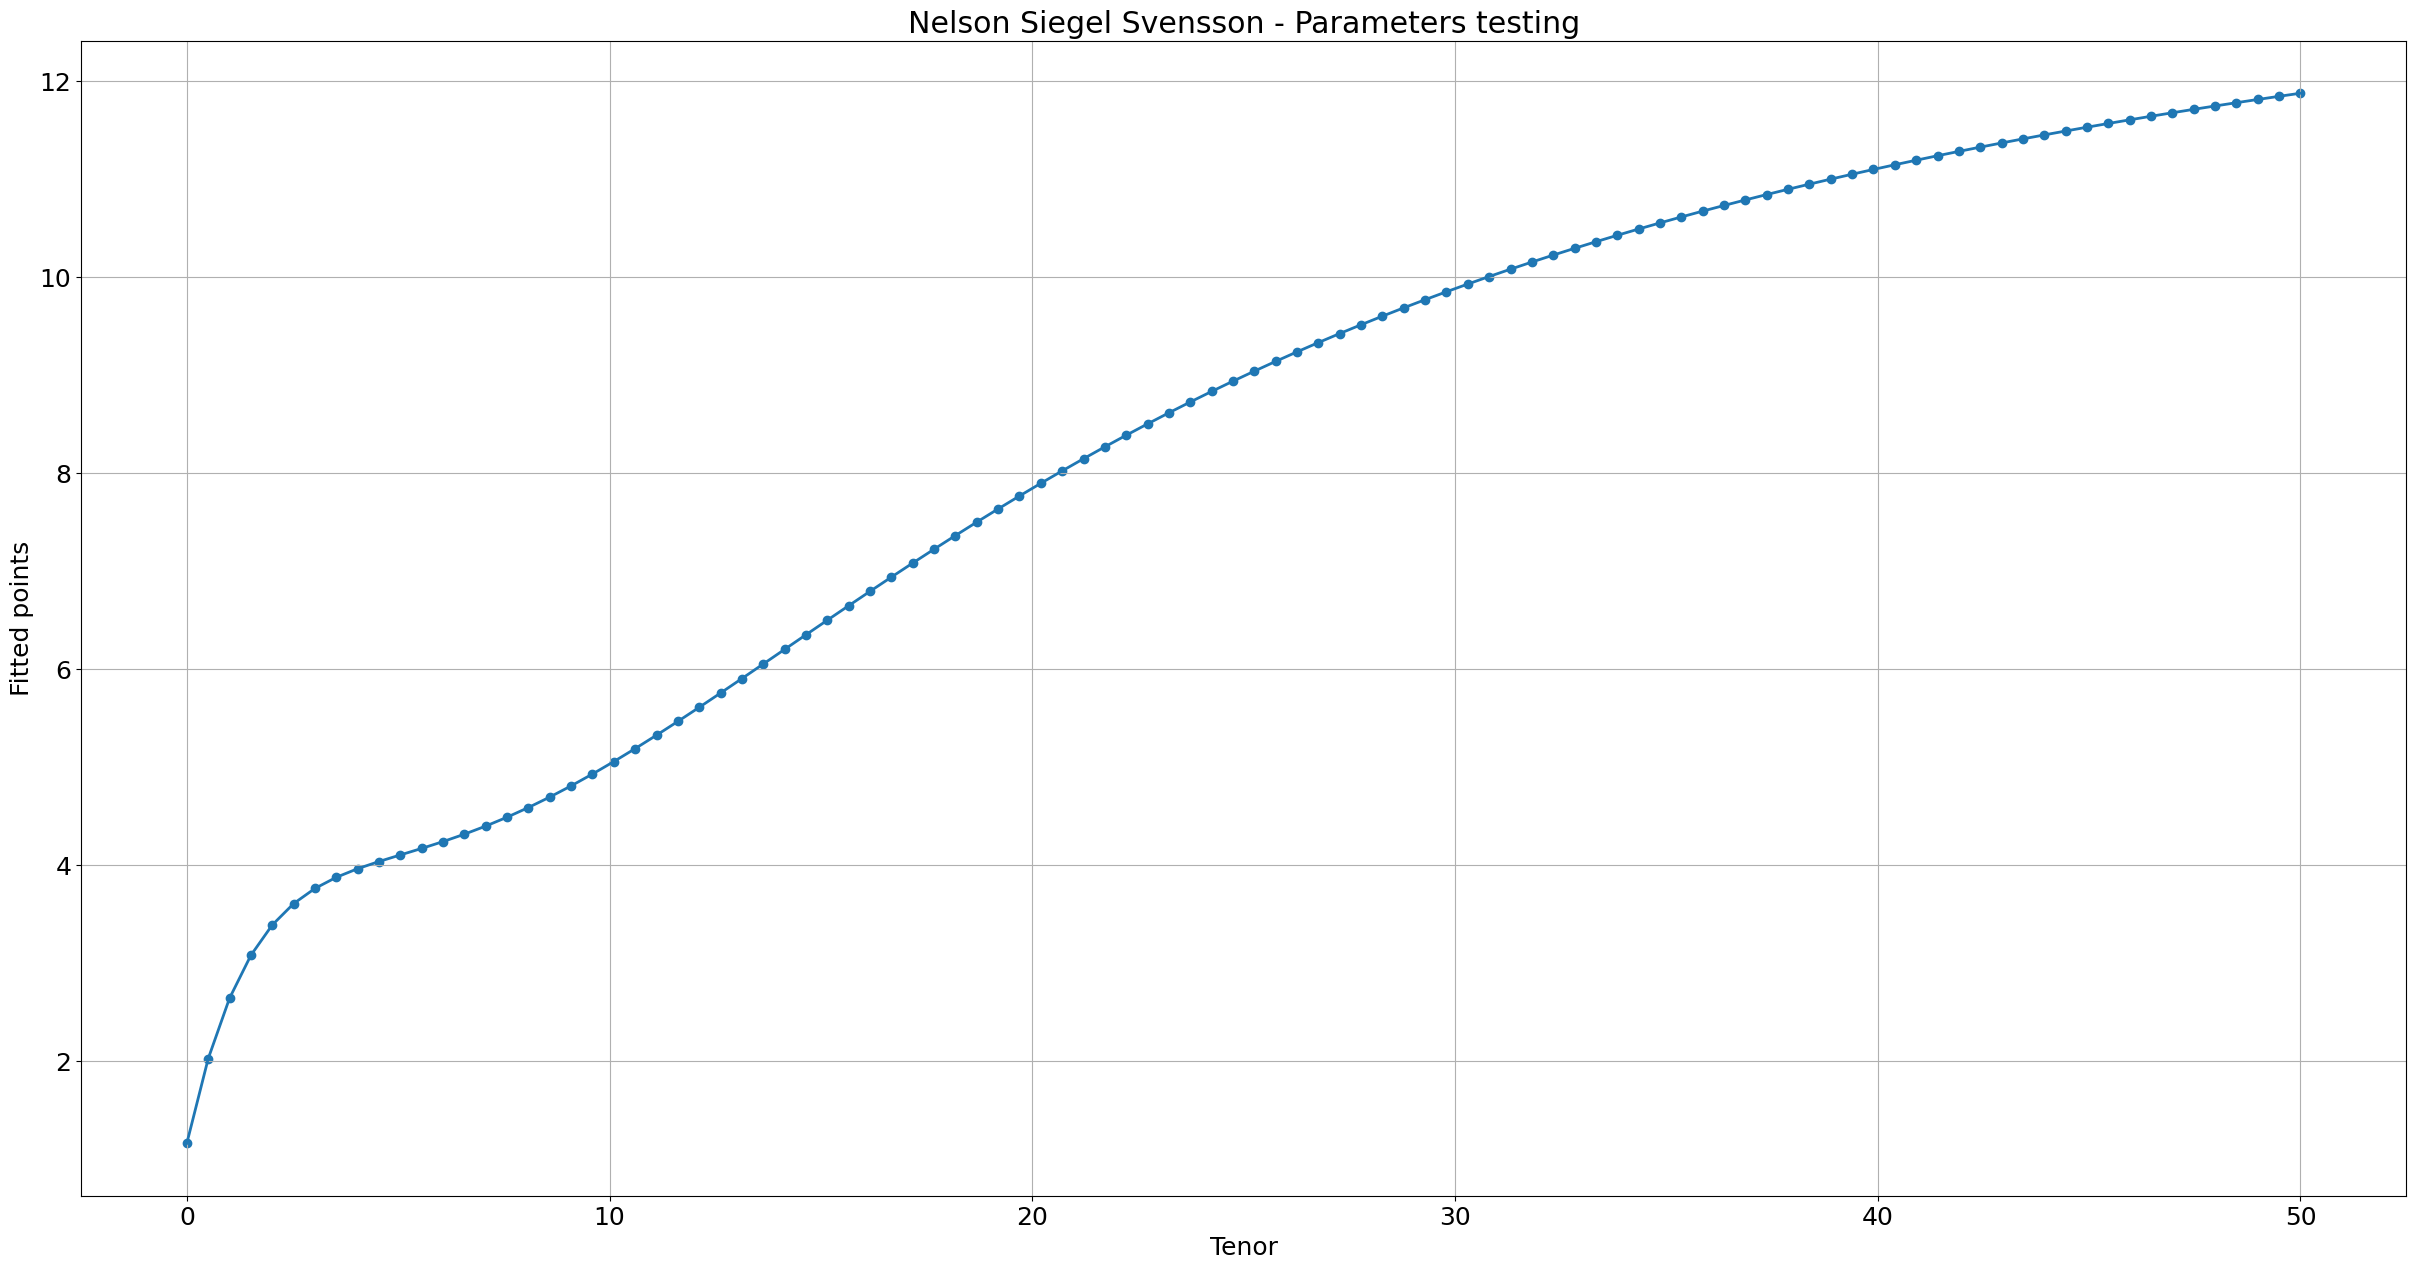

In [42]:
plt.figure(figsize=(30, 15))  # Width and height

plt.title('Nelson Siegel Svensson - Parameters testing')
plt.scatter(t, y(t)*100)
plt.plot(t, y(t)*100)
plt.xlabel('Tenor')
plt.ylabel('Fitted points')
plt.grid()
plt.show()

#### Choosing and Visualizing the Curve
We'll use the parameters arrived at using above step to build the zero coupon and inferred forward curve.

NS_ZC and NS_Fwd store ZC curve (spot curve) and inferred forward rates respectively.

In [43]:
ZC_NS = NelsonSiegelCurve.zero(curve_NS, tenors)
Fwd_NS = NelsonSiegelCurve.forward(curve_NS, tenors)

In [44]:
ZC_NSS = NelsonSiegelSvenssonCurve.zero(curve_NSS, tenors)
Fwd_NSS = NelsonSiegelSvenssonCurve.forward(curve_NSS, tenors)

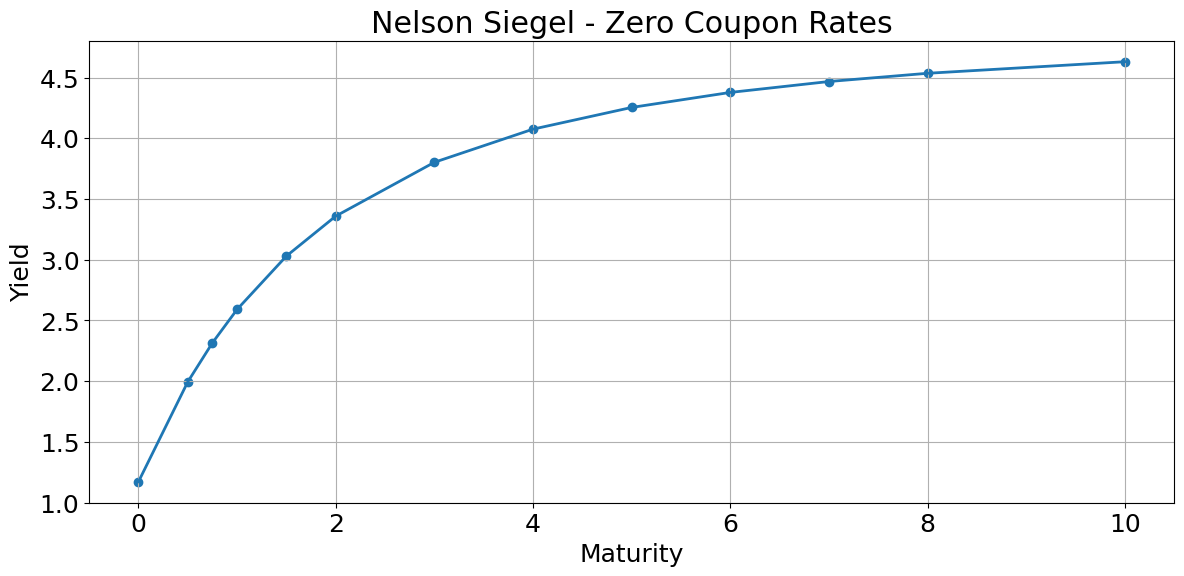

In [45]:
# Visualize ZC curve for NS parametric fitting
plt.title('Nelson Siegel - Zero Coupon Rates')
plt.scatter(tenors, ZC_NS*100)
plt.plot(tenors, ZC_NS*100)
plt.xlabel('Maturity')
plt.ylabel('Yield')
plt.grid()
plt.show()

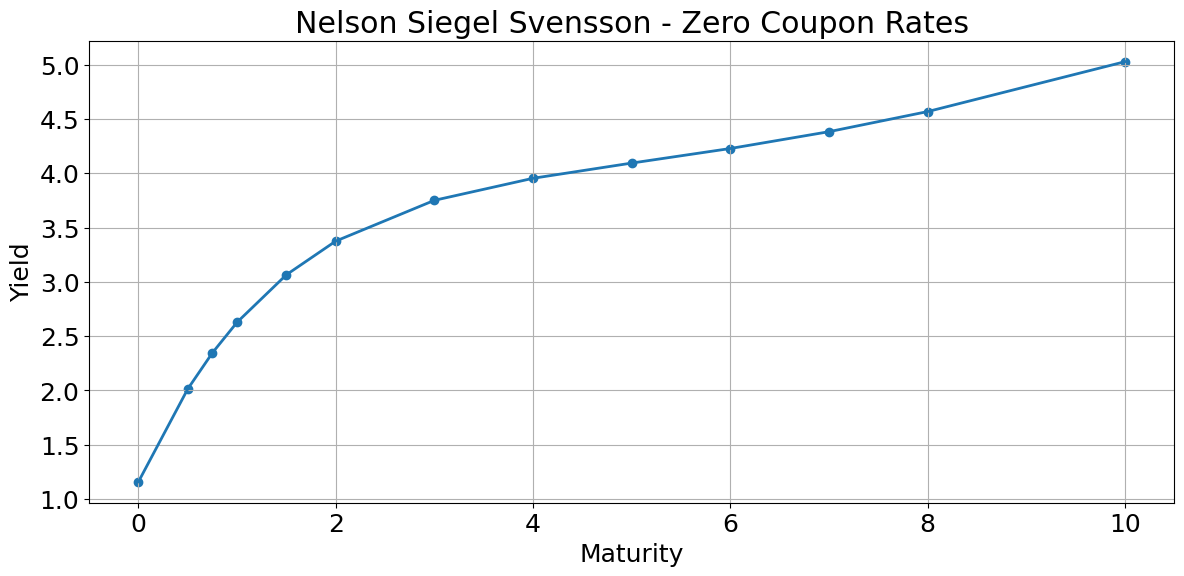

In [46]:
# Visualize ZC curve for NSS parametric fitting
plt.title('Nelson Siegel Svensson - Zero Coupon Rates')
plt.scatter(tenors, ZC_NSS*100)
plt.plot(tenors, ZC_NSS*100)
plt.xlabel('Maturity')
plt.ylabel('Yield')
plt.grid()
plt.show()

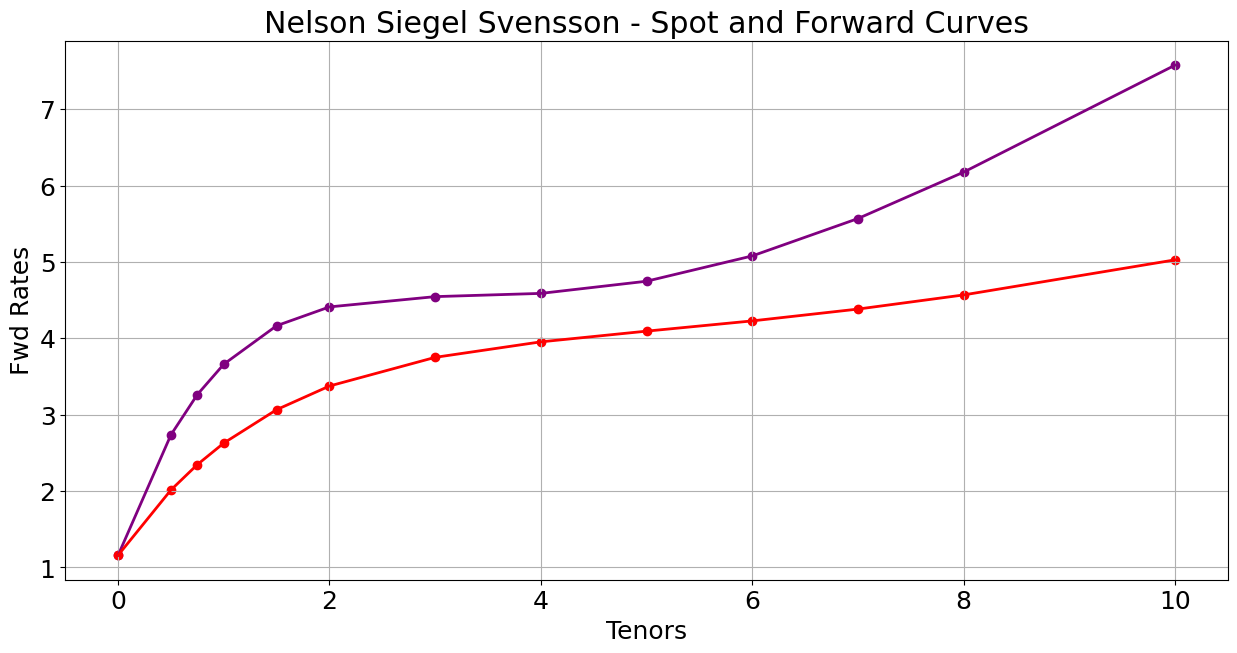

In [47]:
# Compare Spot and Forward Curves

plt.figure(figsize=(15, 7)) 

plt.title('Nelson Siegel Svensson - Spot and Forward Curves')

plt.scatter(tenors, Fwd_NSS*100, c="purple")
plt.plot(tenors, Fwd_NSS*100, c="purple")

plt.scatter(tenors, ZC_NSS*100, c="red")
plt.plot(tenors, ZC_NSS*100, c="red")

plt.xlabel('Tenors')
plt.ylabel('Fwd Rates')
plt.grid()
plt.show()

#### References
[1] Federal Reserve USD Nominal Yield Curve

[2] Bank of England Yield Curve Archive data available on instruments linked to sterling interbank rates (LIBOR). These commercial bank liability curves were discontinued in 2021 in line with the cessation of the LIBOR benchmarks.

[3] Clearing Corporation of India Ltd

[4] Nelson Siegel Svensson API Documentation

[5] James Ma Weiming (2015), Mastering Python for Finance.

#### Appendix A. Price/Yield relationship
The centre piece illustration to ZCB pricing: the classic non-linear price/yield relationship. Notice discrete rate application $(1 + y)^T$ as opposed to $e^{rT}$.

You can extend this demo (and your own understanding) by computing convexity and duration numbers for each of the priced zero bonds.

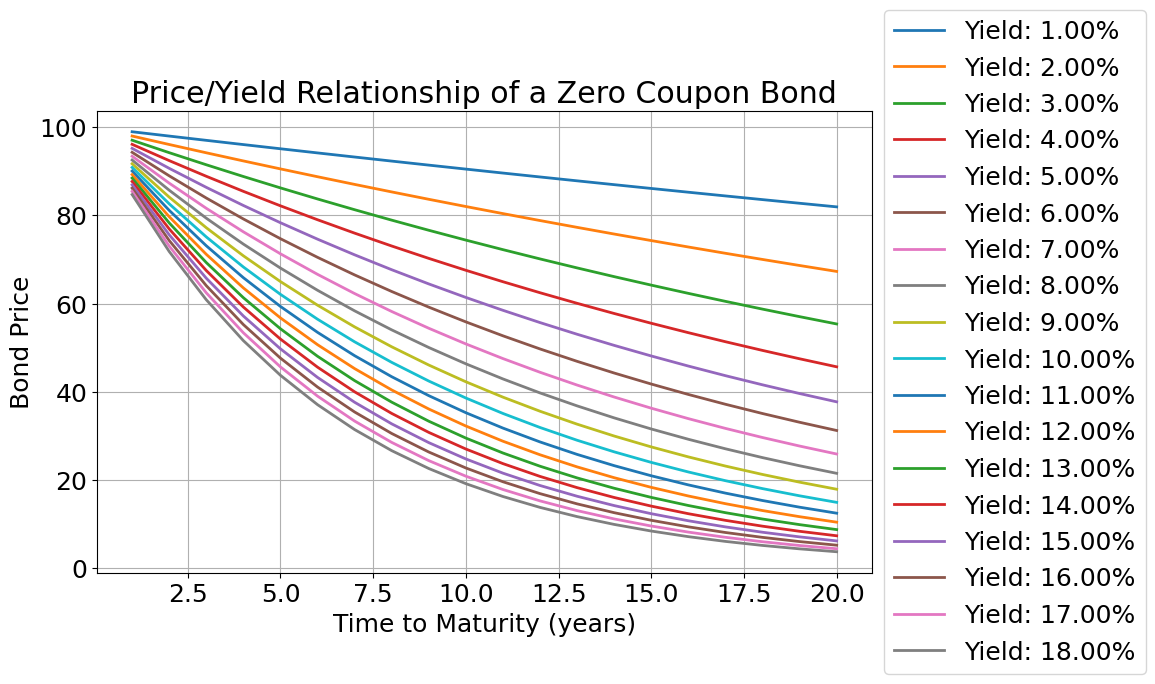

In [48]:
def calculate_price(par_value, yield_rate, TTM):
    return par_value / ((1 + yield_rate) ** TTM)

def calculate_yield(par_value, bond_price, TTM):
    return ((par_value / bond_price) ** (1 / TTM)) - 1

par_value = 100  # Par value of the bond
TTM = np.arange(1, 21)  # Time to maturity in years

# Calculate prices for different yield rates
yield_rates = np.linspace(0.01, 0.18, 18)  # Yield rates for min, max, count
bond_prices = []
for yield_rate in yield_rates:
    price = calculate_price(par_value, yield_rate, TTM)
    bond_prices.append(price)

# Plotting
plt.figure(figsize=(10, 6))
for i, yield_rate in enumerate(yield_rates):
    plt.plot(TTM, bond_prices[i], label=f"Yield: {yield_rate:.2%}")

plt.title("Price/Yield Relationship of a Zero Coupon Bond")
plt.xlabel("Time to Maturity (years)")
plt.ylabel("Bond Price")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()